## Import the libraries

In [1]:
import pickle
import pandas as pd

## Import the final dataset

In [2]:
import pickle
import pandas as pd

# Unpickle
with open('Datasets/df_2018_to_2022_raw_with_extra_features.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head(2)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings
0,22018,203500,Steven Adams,0021801226,2019-04-10,OKC @ MIL,OKC,MIL,0,1,...,4,2,0,0,0,1,0,1,4,13.453
1,22018,203500,Steven Adams,0021801218,2019-04-09,OKC vs. HOU,OKC,HOU,1,1,...,4,8,5,1,0,0,0,1,8,17.227


## Include double-double and triple-double features

DraftKings criteria:
- Double-double (max 1 per player): 
    - Points, Rebounds, Assists, Blocks, Steals
- Triple-double (max 1 per player): 
    - Points, Rebounds, Assists, Blocks, Steals

In [4]:
def get_double_and_triple_doubles(player_info):
    points = player_info['Points']
    rebounds = player_info['Offensive Rebounds'] + player_info['Defensive Rebounds']
    assists = player_info['Assists']
    blocks = player_info['Blocks']
    steals = player_info['Steals']

    stats = [points, rebounds, assists, blocks, steals]

    cnt = 0
    for stat in stats:
        if int(stat) >= 10:
            cnt += 1

    if cnt >= 3:
        return 'Triple-double'
    elif cnt == 2:
        return 'Double-double'
    else: 
        return None

### Testing the function

In [5]:
# This player, in this game, should get a double-double (assists and points)
df[(df['Assists'] > 10) & (df['Points'] > 10)].head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings
504,22018,203507,Giannis Antetokounmpo,0021800854,2019-02-13,MIL @ IND,MIL,IND,0,1,...,10,7,12,11,2,1,2,1,33,59.145
511,22018,203507,Giannis Antetokounmpo,0021800750,2019-01-29,MIL @ DET,MIL,DET,0,1,...,5,1,7,11,3,2,2,5,21,41.061
549,22018,203507,Giannis Antetokounmpo,0021800133,2018-11-04,MIL vs. SAC,MIL,SAC,1,1,...,12,3,12,11,1,1,5,3,26,47.679


In [6]:
df[(df['Assists'] > 10) & (df['Points'] > 10)].iloc[1]

Season ID                                      22018
Player ID                                     203507
Player Name                    Giannis Antetokounmpo
Game ID                                   0021800750
Game Date                        2019-01-29 00:00:00
Matchup                                    MIL @ DET
Player Team                                      MIL
Opponent                                         DET
Home                                               0
Won                                                1
Minutes played                                    35
Field Goals Made                                   8
Field Goals Attempted                             16
Field Goals 3 Points Made                          1
Field Goal 3 Points Attempt                        4
Free Throws Made                                   4
Free Throws Attempt                                5
Offensive Rebounds                                 1
Defensive Rebounds                            

In [7]:
test = df[(df['Assists'] > 10) & (df['Points'] > 10)].iloc[1]
get_double_and_triple_doubles(test)

'Double-double'

In [8]:
# This player, in this game, should get a triple-double (assists, points and rebounds)
df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings
504,22018,203507,Giannis Antetokounmpo,0021800854,2019-02-13,MIL @ IND,MIL,IND,0,1,...,10,7,12,11,2,1,2,1,33,59.145


In [9]:
test = df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)
get_double_and_triple_doubles(test)

'Triple-double'

In [11]:
# This player, in this game, should get None
df.iloc[2]

Season ID                                    22018
Player ID                                   203500
Player Name                           Steven Adams
Game ID                                 0021801197
Game Date                      2019-04-07 00:00:00
Matchup                                  OKC @ MIN
Player Team                                    OKC
Opponent                                       MIN
Home                                             0
Won                                              1
Minutes played                                  27
Field Goals Made                                 4
Field Goals Attempted                            5
Field Goals 3 Points Made                        0
Field Goal 3 Points Attempt                      0
Free Throws Made                                 0
Free Throws Attempt                              0
Offensive Rebounds                               2
Defensive Rebounds                               4
Assists                        

In [12]:
test = df.iloc[2]
print(get_double_and_triple_doubles(test))

None


### Apply the function

In [13]:
df = df.reset_index(drop=True)

results = []

for index, row in df.iterrows():
    results.append(get_double_and_triple_doubles(row))

df['Double/Triple double'] = results

### Check the results

In [14]:
# This player, in this game, should get a double-double (assists and points)
df[(df['Assists'] > 10) & (df['Points'] > 10)].iloc[1]

Season ID                                      22018
Player ID                                     203507
Player Name                    Giannis Antetokounmpo
Game ID                                   0021800750
Game Date                        2019-01-29 00:00:00
Matchup                                    MIL @ DET
Player Team                                      MIL
Opponent                                         DET
Home                                               0
Won                                                1
Minutes played                                    35
Field Goals Made                                   8
Field Goals Attempted                             16
Field Goals 3 Points Made                          1
Field Goal 3 Points Attempt                        4
Free Throws Made                                   4
Free Throws Attempt                                5
Offensive Rebounds                                 1
Defensive Rebounds                            

In [15]:
# This player, in this game, should get a triple-double (assists, points and rebounds)
df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double
504,22018,203507,Giannis Antetokounmpo,0021800854,2019-02-13,MIL @ IND,MIL,IND,0,1,...,7,12,11,2,1,2,1,33,59.145,Triple-double


In [18]:
# This player, in this game, should get None
print(df.iloc[2]['Double/Triple double'])

None


### Create the double-double and triple-double features

In [19]:
df['Double-double'] = df['Double/Triple double'].apply(lambda x: 1 if x == 'Double-double' else 0)
df['Triple-double'] = df['Double/Triple double'].apply(lambda x: 1 if x == 'Triple-double' else 0)

df.head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double,Double-double,Triple-double
0,22018,203500,Steven Adams,0021801226,2019-04-10,OKC @ MIL,OKC,MIL,0,1,...,0,0,1,0,1,4,13.453,None,0,0
1,22018,203500,Steven Adams,0021801218,2019-04-09,OKC vs. HOU,OKC,HOU,1,1,...,1,0,0,0,1,8,17.227,None,0,0
2,22018,203500,Steven Adams,0021801197,2019-04-07,OKC @ MIN,OKC,MIN,0,1,...,1,1,0,3,6,8,11.285,None,0,0


In [20]:
# This player, in this game, should get a double-double (assists and points)
df[(df['Assists'] > 10) & (df['Points'] > 10)].iloc[1]['Double/Triple double']

'Double-double'

In [21]:
# This player, in this game, should get a triple-double (assists, points and rebounds)
df[(df['Assists'] > 10) & (df['Points'] > 10) & (df['Offensive Rebounds'] + df['Defensive Rebounds']> 10)].head(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double/Triple double,Double-double,Triple-double
504,22018,203507,Giannis Antetokounmpo,0021800854,2019-02-13,MIL @ IND,MIL,IND,0,1,...,11,2,1,2,1,33,59.145,Triple-double,0,1


In [23]:
# This player, in this game, should get None
print(df.iloc[2]['Double/Triple double'])

None


In [24]:
df.drop(['Double/Triple double'], axis=1, inplace=True)
df.head(2)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double
0,22018,203500,Steven Adams,0021801226,2019-04-10,OKC @ MIL,OKC,MIL,0,1,...,0,0,0,1,0,1,4,13.453,0,0
1,22018,203500,Steven Adams,0021801218,2019-04-09,OKC vs. HOU,OKC,HOU,1,1,...,5,1,0,0,0,1,8,17.227,0,0


## Include DraftKings score (model's output)

In [25]:
def get_draftkings_score(player_info):
    points = player_info['Points']
    three_points = player_info['Field Goals 3 Points Made']
    rebounds = player_info['Offensive Rebounds'] + player_info['Defensive Rebounds']
    assists = player_info['Assists']
    steals = player_info['Steals']
    blocks = player_info['Blocks']
    turnovers = player_info['Turnovers']
    double_double = player_info['Double-double']
    triple_double = player_info['Triple-double']

    return points*1 + three_points*0.5 + rebounds*1.25 + assists*1.5 * steals*2 + blocks*2 + turnovers*(-0.5) + double_double*1.5 + triple_double*3

In [26]:
df = df.reset_index(drop=True)

results = []

for index, row in df.iterrows():
    results.append(get_draftkings_score(row))

df['DraftKings score'] = results
df.head(3)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
0,22018,203500,Steven Adams,0021801226,2019-04-10,OKC @ MIL,OKC,MIL,0,1,...,0,0,1,0,1,4,13.453,0,0,8.50
1,22018,203500,Steven Adams,0021801218,2019-04-09,OKC vs. HOU,OKC,HOU,1,1,...,1,0,0,0,1,8,17.227,0,0,24.25
2,22018,203500,Steven Adams,0021801197,2019-04-07,OKC @ MIN,OKC,MIN,0,1,...,1,1,0,3,6,8,11.285,0,0,17.00


### Include the next Draftking score

In [27]:
df = df.sort_values(['Player ID', 'Game Date'], ascending=True)
df.head()

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score
14066,22018,101108,Chris Paul,0021800009,2018-10-17,HOU vs. NOP,HOU,NOP,1,0,...,6,2,0,1,3,19,33.838,0,0,62.25
14065,22018,101108,Chris Paul,0021800035,2018-10-20,HOU @ LAL,HOU,LAL,0,1,...,10,1,0,3,2,28,49.812,1,0,68.25
14064,22018,101108,Chris Paul,0021800070,2018-10-26,HOU vs. LAC,HOU,LAC,1,0,...,8,2,0,5,3,12,21.051,0,0,65.00
14063,22018,101108,Chris Paul,0021800101,2018-10-30,HOU vs. POR,HOU,POR,1,0,...,9,2,0,2,4,17,28.153,0,0,77.25
14062,22018,101108,Chris Paul,0021800118,2018-11-02,HOU @ BKN,HOU,BKN,0,1,...,11,2,2,2,4,32,53.783,1,0,113.75


In [28]:
df.reset_index(drop=True, inplace=True)
draftkings_score_next_game = []

for index, row in df.iterrows():
    if index + 1 == df.shape[0]:
        draftkings_score_next_game.append(None)
    else: 
        if df['Player ID'].iloc[index + 1] == row['Player ID']:
            draftkings_score_next_game.append(df['DraftKings score'].iloc[index + 1])
        else:
            draftkings_score_next_game.append(None)

In [29]:
df['Draftkings next game score'] = draftkings_score_next_game

In [30]:
df[df['Player Name'] == 'Chris Paul'].tail(1)

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score
256,22021,101108,Chris Paul,0022101099,2022-03-24,PHX @ DEN,PHX,DEN,0,1,...,1,1,3,0,17,39.854,1,0,63.5,NaN


In [31]:
df.iloc[195:205]

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score
195,22020,101108,Chris Paul,0022001039,2021-05-11,PHX @ GSW,PHX,GSW,0,0,...,1,1,3,4,24,39.930,1,0,60.75,26.50
196,22020,101108,Chris Paul,0022001053,2021-05-13,PHX vs. POR,PHX,POR,1,1,...,0,0,1,3,26,39.985,0,0,26.50,53.25
197,22020,101108,Chris Paul,0022001065,2021-05-15,PHX @ SAS,PHX,SAS,0,1,...,1,0,2,1,16,41.968,1,0,53.25,83.00
198,22021,101108,Chris Paul,0022100012,2021-10-20,PHX vs. DEN,PHX,DEN,1,0,...,2,1,3,3,15,29.261,1,0,83.00,112.75
199,22021,101108,Chris Paul,0022100025,2021-10-22,PHX @ LAL,PHX,LAL,0,1,...,2,0,5,3,23,47.637,1,0,112.75,39.00
200,22021,101108,Chris Paul,0022100033,2021-10-23,PHX @ POR,PHX,POR,0,0,...,1,0,1,0,4,22.411,0,0,39.00,61.00
201,22021,101108,Chris Paul,0022100062,2021-10-27,PHX vs. SAC,PHX,SAC,1,0,...,2,0,1,2,6,24.398,0,0,61.00,140.00
202,22021,101108,Chris Paul,0022100088,2021-10-30,PHX vs. CLE,PHX,CLE,1,1,...,4,0,2,2,16,25.005,1,0,140.00,78.25
203,22021,101108,Chris Paul,0022100106,2021-11-02,PHX vs. NOP,PHX,NOP,1,1,...,1,1,4,3,14,32.285,1,0,78.25,213.75
204,22021,101108,Chris Paul,0022100122,2021-11-04,PHX vs. HOU,PHX,HOU,1,1,...,5,2,2,3,9,32.825,0,0,213.75,65.50


In [32]:
print(f'df.shape: {df.shape}')

df.shape: (80894, 30)


### Include the next opponent

In [33]:
df.reset_index(drop=True, inplace=True)
next_opponent = []

for index, row in df.iterrows():
    if index + 1 == df.shape[0]:
        next_opponent.append(None)
    else: 
        if df['Player ID'].iloc[index + 1] == row['Player ID']:
            next_opponent.append(df['Opponent'].iloc[index + 1])
        else:
            next_opponent.append(None)

In [34]:
df['Next Opponent'] = next_opponent

In [35]:
df.iloc[195:205]

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score,Next Opponent
195,22020,101108,Chris Paul,0022001039,2021-05-11,PHX @ GSW,PHX,GSW,0,0,...,1,3,4,24,39.930,1,0,60.75,26.50,POR
196,22020,101108,Chris Paul,0022001053,2021-05-13,PHX vs. POR,PHX,POR,1,1,...,0,1,3,26,39.985,0,0,26.50,53.25,SAS
197,22020,101108,Chris Paul,0022001065,2021-05-15,PHX @ SAS,PHX,SAS,0,1,...,0,2,1,16,41.968,1,0,53.25,83.00,DEN
198,22021,101108,Chris Paul,0022100012,2021-10-20,PHX vs. DEN,PHX,DEN,1,0,...,1,3,3,15,29.261,1,0,83.00,112.75,LAL
199,22021,101108,Chris Paul,0022100025,2021-10-22,PHX @ LAL,PHX,LAL,0,1,...,0,5,3,23,47.637,1,0,112.75,39.00,POR
200,22021,101108,Chris Paul,0022100033,2021-10-23,PHX @ POR,PHX,POR,0,0,...,0,1,0,4,22.411,0,0,39.00,61.00,SAC
201,22021,101108,Chris Paul,0022100062,2021-10-27,PHX vs. SAC,PHX,SAC,1,0,...,0,1,2,6,24.398,0,0,61.00,140.00,CLE
202,22021,101108,Chris Paul,0022100088,2021-10-30,PHX vs. CLE,PHX,CLE,1,1,...,0,2,2,16,25.005,1,0,140.00,78.25,NOP
203,22021,101108,Chris Paul,0022100106,2021-11-02,PHX vs. NOP,PHX,NOP,1,1,...,1,4,3,14,32.285,1,0,78.25,213.75,HOU
204,22021,101108,Chris Paul,0022100122,2021-11-04,PHX vs. HOU,PHX,HOU,1,1,...,2,2,3,9,32.825,0,0,213.75,65.50,ATL


In [38]:
df.isna().sum()

Season ID                        0
Player ID                        0
Player Name                      0
Game ID                          0
Game Date                        0
Matchup                          0
Player Team                      0
Opponent                         0
Home                             0
Won                              0
Minutes played                   0
Field Goals Made                 0
Field Goals Attempted            0
Field Goals 3 Points Made        0
Field Goal 3 Points Attempt      0
Free Throws Made                 0
Free Throws Attempt              0
Offensive Rebounds               0
Defensive Rebounds               0
Assists                          0
Steals                           0
Blocks                           0
Turnovers                        0
Personal Fouls                   0
Points                           0
Player Efficiency Ratings        0
Double-double                    0
Triple-double                    0
DraftKings score    

In [39]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [40]:
df.isna().sum().sum()

0

In [41]:
import pickle
import pandas as pd

# Pickle
# with open('Datasets/df_2018_to_2022_with_next_game_draftkings_score.pkl', 'wb') as f:
    # pickle.dump(df, f)

# Unpickle
# with open('Datasets/df_2018_to_2021_with_next_game_draftkings_score.pkl', 'rb') as f:
    # df = pickle.load(f)

## Prepare the 'mean' dataset

In [42]:
df.columns

Index(['Season ID', 'Player ID', 'Player Name', 'Game ID', 'Game Date',
       'Matchup', 'Player Team', 'Opponent', 'Home', 'Won', 'Minutes played',
       'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'DraftKings score',
       'Draftkings next game score', 'Next Opponent'],
      dtype='object')

In [43]:
def get_player_mean_stats(df, n_games):
    """
    df: Pandas dataframe
    n_games: Number of records to be used in the mean
    """
    
    columns_to_drop = ['Season ID', 'Player ID', 'Player Name', 
        'Game ID', 'Game Date', 'Matchup', 'Player Team', 'Opponent', 'Next Opponent',
        'Home', 'Won', 'DraftKings score', 'Draftkings next game score']
    
    players_ids = df['Player ID'].unique()

    mean_values = []
    mean_values_opponent = []
    game_dates = []
    season_ids = []
    player_ids_list = []
    player_names = []
    game_ids = []
    draftkings_scores = []
    draftkings_scores_next_game = []
    
    for player_id in players_ids:
        sub_df = df[df['Player ID'] == player_id].sort_values('Game Date', ascending=True)
        sub_df.reset_index(drop=True, inplace=True)
        for index, row in sub_df.iterrows():
            if index + 1 >= n_games:
                mean_values.append(sub_df.iloc[index+1-n_games : index+1].drop(columns_to_drop, axis=1).mean())
                game_dates.append(row['Game Date'])
                season_ids.append(row['Season ID'])
                player_ids_list.append(row['Player ID'])
                player_names.append(row['Player Name'])
                game_ids.append(row['Game ID'])
                draftkings_scores.append(row['DraftKings score'])
                draftkings_scores_next_game.append(row['Draftkings next game score'])
                                
    results_mean = pd.DataFrame(data=mean_values)
    results_mean['Game Date'] = game_dates
    results_mean['Season ID'] = season_ids
    results_mean['Player ID'] = player_ids_list
    results_mean['Player Name'] = player_names
    results_mean['Game ID'] = game_ids
    results_mean['Draftkings score'] = draftkings_scores    
    results_mean['Draftkings next game score'] = draftkings_scores_next_game

    return results_mean

In [44]:
mean_5_games_df_no_opponent = get_player_mean_stats(df, 5)

In [45]:
mean_5_games_df_no_opponent.isnull().sum().sum()

0

In [46]:
df[df['Player Name'] == 'LeBron James'].iloc[0:10]

,Season ID,Player ID,Player Name,Game ID,Game Date,Matchup,Player Team,Opponent,Home,Won,...,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,DraftKings score,Draftkings next game score,Next Opponent
79337,22018,2544,LeBron James,0021800016,2018-10-18,LAL @ POR,LAL,POR,0,0,...,0,6,3,26,32.464,1,0,57.50,62.25,HOU
79338,22018,2544,LeBron James,0021800035,2018-10-20,LAL vs. HOU,LAL,HOU,1,0,...,1,1,0,24,32.836,0,0,62.25,86.00,SAS
79339,22018,2544,LeBron James,0021800048,2018-10-22,LAL vs. SAS,LAL,SAS,1,0,...,1,5,2,32,39.228,1,0,86.00,119.75,PHX
79340,22018,2544,LeBron James,0021800060,2018-10-24,LAL @ PHX,LAL,PHX,0,1,...,0,0,1,19,51.241,1,0,119.75,143.25,DEN
79341,22018,2544,LeBron James,0021800066,2018-10-25,LAL vs. DEN,LAL,DEN,1,1,...,0,2,3,28,45.901,0,1,143.25,73.25,SAS
79342,22018,2544,LeBron James,0021800082,2018-10-27,LAL @ SAS,LAL,SAS,0,0,...,0,4,3,35,48.666,1,0,73.25,94.00,MIN
79343,22018,2544,LeBron James,0021800093,2018-10-29,LAL @ MIN,LAL,MIN,0,0,...,2,5,2,29,44.685,1,0,94.00,88.75,DAL
79344,22018,2544,LeBron James,0021800109,2018-10-31,LAL vs. DAL,LAL,DAL,1,1,...,0,3,3,29,35.750,0,0,88.75,37.25,POR
79345,22018,2544,LeBron James,0021800132,2018-11-03,LAL @ POR,LAL,POR,0,1,...,2,3,1,28,43.348,0,0,37.25,22.00,TOR
79346,22018,2544,LeBron James,0021800139,2018-11-04,LAL vs. TOR,LAL,TOR,1,0,...,1,3,3,18,24.713,0,0,22.00,43.25,MIN


In [47]:
pd.set_option('display.max_columns', None)
mean_5_games_df_no_opponent[mean_5_games_df_no_opponent['Player Name'] == 'LeBron James']

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Game Date,Season ID,Player ID,Player Name,Game ID,Draftkings score,Draftkings next game score
77161,36.4,9.2,19.2,1.0,5.8,6.4,8.2,0.8,7.8,9.2,2.0,0.4,2.8,1.8,25.8,40.3340,0.6,0.2,2018-10-25,22018,2544,LeBron James,0021800066,143.25,73.25
77162,35.8,10.0,20.2,1.4,6.2,6.2,8.0,0.6,7.8,8.8,2.2,0.4,2.4,1.8,27.6,43.5744,0.6,0.2,2018-10-27,22018,2544,LeBron James,0021800082,73.25,94.00
77163,35.2,10.4,20.4,1.8,6.0,6.0,7.6,1.2,8.2,9.4,2.2,0.6,3.2,2.2,28.6,45.9442,0.8,0.2,2018-10-29,22018,2544,LeBron James,0021800093,94.00,88.75
77164,34.4,10.4,19.2,1.8,5.0,5.4,6.8,0.8,8.0,7.8,2.6,0.4,2.8,2.4,28.0,45.2486,0.6,0.2,2018-10-31,22018,2544,LeBron James,0021800109,88.75,37.25
77165,35.0,10.8,20.0,1.8,5.0,6.4,8.2,0.8,7.6,7.2,2.0,0.8,3.4,2.4,29.8,43.6700,0.4,0.2,2018-11-03,22018,2544,LeBron James,0021800132,37.25,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77372,37.4,12.8,24.0,4.0,9.8,7.6,8.8,1.0,8.2,6.2,0.2,1.6,4.0,1.2,37.2,48.8190,0.2,0.2,2022-03-13,22021,2544,LeBron James,0022101019,42.25,44.75
77373,38.0,13.4,24.2,4.4,9.4,6.8,8.2,1.4,8.0,6.0,0.2,1.8,4.2,1.6,38.0,48.8386,0.2,0.2,2022-03-14,22021,2544,LeBron James,0022101028,44.75,39.25
77374,37.6,11.2,22.2,3.4,8.8,4.8,6.6,1.0,7.4,6.2,0.4,2.0,4.4,2.6,30.6,39.1438,0.0,0.2,2022-03-16,22021,2544,LeBron James,0022101039,39.25,50.75
77375,37.6,12.4,22.2,3.6,8.4,4.8,6.8,1.4,6.0,5.2,0.2,1.6,4.0,2.8,33.2,40.3364,0.0,0.0,2022-03-18,22021,2544,LeBron James,0022101051,50.75,53.00


In [48]:
def get_player_mean_stats_opponent(df, n_games):
    """
    df: Pandas dataframe
    n_games: Number of records to be used in the mean
    """
    
    columns_to_drop = ['Season ID', 'Player ID', 'Player Name', 
        'Game ID', 'Game Date', 'Matchup', 'Player Team', 'Opponent', 'Next Opponent',
        'Home', 'Won', 'DraftKings score', 'Draftkings next game score']
    
    players_ids = df['Player ID'].unique()

    mean_values_opponent = []
    season_ids = []
    player_ids_list = []
    game_ids = []

    for player_id in players_ids:
        sub_df = df[df['Player ID'] == player_id].sort_values('Game Date', ascending=True)
        sub_df.reset_index(drop=True, inplace=True)
        for index, row in sub_df.iterrows():
            if index + 1 >= n_games:
                results_opponent_aux = sub_df[(sub_df['Opponent'] == row['Next Opponent']) & (sub_df['Game Date'] <= row['Game Date'])].sort_values('Game Date', ascending=False).drop(columns_to_drop, axis=1)
                
                if results_opponent_aux.shape[0] > 0:
                    season_ids.append(row['Season ID'])
                    player_ids_list.append(row['Player ID'])
                    game_ids.append(row['Game ID'])
                    n_results = min(results_opponent_aux.shape[0], n_games)
                    mean_values_opponent.append(results_opponent_aux.loc[:][0:n_results].mean())
                
    results_mean_opponent = pd.DataFrame(data=mean_values_opponent)

    column_names = ['Opp - Minutes played', 'Opp - Field Goals Made', 'Opp - Field Goals Attempted',
        'Opp - Field Goals 3 Points Made', 'Opp - Field Goal 3 Points Attempt',
        'Opp - Free Throws Made', 'Opp - Free Throws Attempt', 'Opp - Offensive Rebounds',
        'Opp - Defensive Rebounds', 'Opp - Assists', 'Opp - Steals', 'Opp - Blocks', 'Opp - Turnovers',
        'Opp - Personal Fouls', 'Opp - Points', 'Opp - Player Efficiency Ratings',
        'Opp - Double-double', 'Opp - Triple-double']
    
    results_mean_opponent.columns = column_names

    results_mean_opponent['Season ID'] = season_ids
    results_mean_opponent['Player ID'] = player_ids_list
    results_mean_opponent['Game ID'] = game_ids
    
    return results_mean_opponent

In [49]:
mean_5_games_df_with_opponent = get_player_mean_stats_opponent(df, 5)

In [50]:
mean_5_games_df_with_opponent.isna().sum().sum()

0

In [51]:
mean_5_games_df_with_opponent.head()

,Opp - Minutes played,Opp - Field Goals Made,Opp - Field Goals Attempted,Opp - Field Goals 3 Points Made,Opp - Field Goal 3 Points Attempt,Opp - Free Throws Made,Opp - Free Throws Attempt,Opp - Offensive Rebounds,Opp - Defensive Rebounds,Opp - Assists,Opp - Steals,Opp - Blocks,Opp - Turnovers,Opp - Personal Fouls,Opp - Points,Opp - Player Efficiency Ratings,Opp - Double-double,Opp - Triple-double,Season ID,Player ID,Game ID
0,38.0,4.0,12.0,0.0,6.0,1.0,2.0,1.0,4.0,13.0,1.0,0.0,5.0,2.0,9.0,16.581,0.0,0.0,22018,101108,0021800180
1,35.0,8.0,16.0,1.0,6.0,3.0,4.0,0.0,2.0,7.0,1.0,0.0,3.0,3.0,20.0,26.661,0.0,0.0,22018,101108,0021800258
2,40.0,4.0,13.0,2.0,3.0,3.0,4.0,0.0,4.0,4.0,3.0,1.0,1.0,4.0,13.0,20.106,0.0,0.0,22018,101108,0021800267
3,35.0,3.0,11.0,0.0,3.0,1.0,3.0,0.0,6.0,8.0,4.0,0.0,4.0,1.0,7.0,15.271,0.0,0.0,22018,101108,0021800326
4,37.0,6.0,19.0,2.0,8.0,3.0,4.0,1.0,4.0,9.0,2.0,0.0,2.0,4.0,17.0,28.153,0.0,0.0,22018,101108,0021800378


In [52]:
print(f'mean_5_games_df_no_opponent.shape: {mean_5_games_df_no_opponent.shape}')
print(f'mean_5_games_df_with_opponent.shape: {mean_5_games_df_with_opponent.shape}')

mean_5_games_df_no_opponent.shape: (78129, 25)
mean_5_games_df_with_opponent.shape: (66079, 21)


In [53]:
mean_5_games_df_no_opponent.shape[0] - mean_5_games_df_with_opponent.shape[0]

12050

In [54]:
(mean_5_games_df_no_opponent.shape[0] - mean_5_games_df_with_opponent.shape[0])/df['Player ID'].nunique()

21.556350626118068

In [55]:
mean_5_games_df = pd.merge(mean_5_games_df_no_opponent, mean_5_games_df_with_opponent, on=['Season ID', 'Game ID', 'Player ID'])
mean_5_games_df.head()

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Game Date,Season ID,Player ID,Player Name,Game ID,Draftkings score,Draftkings next game score,Opp - Minutes played,Opp - Field Goals Made,Opp - Field Goals Attempted,Opp - Field Goals 3 Points Made,Opp - Field Goal 3 Points Attempt,Opp - Free Throws Made,Opp - Free Throws Attempt,Opp - Offensive Rebounds,Opp - Defensive Rebounds,Opp - Assists,Opp - Steals,Opp - Blocks,Opp - Turnovers,Opp - Personal Fouls,Opp - Points,Opp - Player Efficiency Ratings,Opp - Double-double,Opp - Triple-double
0,37.2,5.6,14.8,1.4,5.6,1.6,2.4,0.8,4.0,8.2,3.2,0.6,3.4,2.8,14.2,24.7176,0.2,0.0,2018-11-10,22018,101108,Chris Paul,0021800180,56.50,78.75,38.0,4.0,12.0,0.0,6.0,1.0,2.0,1.0,4.0,13.0,1.0,0.0,5.0,2.0,9.0,16.581,0.0,0.0
1,32.6,6.8,12.0,3.4,6.6,3.2,4.2,0.0,4.2,6.4,2.0,0.4,3.6,2.2,20.2,31.4664,0.0,0.0,2018-11-21,22018,101108,Chris Paul,0021800258,42.50,25.00,35.0,8.0,16.0,1.0,6.0,3.0,4.0,0.0,2.0,7.0,1.0,0.0,3.0,3.0,20.0,26.661,0.0,0.0
2,33.0,6.6,12.6,2.8,6.2,3.0,3.6,0.2,3.8,7.2,1.4,0.4,3.6,2.6,19.0,29.8884,0.0,0.0,2018-11-23,22018,101108,Chris Paul,0021800267,25.00,52.75,40.0,4.0,13.0,2.0,3.0,3.0,4.0,0.0,4.0,4.0,3.0,1.0,1.0,4.0,13.0,20.106,0.0,0.0
3,32.2,6.2,12.8,2.6,6.2,2.6,3.0,0.4,3.6,8.4,1.2,0.4,3.0,2.8,17.6,31.2854,0.2,0.0,2018-11-30,22018,101108,Chris Paul,0021800326,52.75,96.25,35.0,3.0,11.0,0.0,3.0,1.0,3.0,0.0,6.0,8.0,4.0,0.0,4.0,1.0,7.0,15.271,0.0,0.0
4,31.6,5.0,12.6,1.6,6.0,1.6,2.2,0.4,2.4,8.6,1.4,0.2,3.2,2.0,13.2,24.7106,0.4,0.0,2018-12-08,22018,101108,Chris Paul,0021800378,50.00,119.25,37.0,6.0,19.0,2.0,8.0,3.0,4.0,1.0,4.0,9.0,2.0,0.0,2.0,4.0,17.0,28.153,0.0,0.0


In [56]:
mean_5_games_df.shape

(66079, 43)

In [57]:
mean_5_games_df = mean_5_games_df.sort_values('Game Date', ascending=True)
mean_5_games_df.reset_index(drop=True, inplace=True)
mean_5_games_df.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Game Date,Season ID,Player ID,Player Name,Game ID,Draftkings score,Draftkings next game score,Opp - Minutes played,Opp - Field Goals Made,Opp - Field Goals Attempted,Opp - Field Goals 3 Points Made,Opp - Field Goal 3 Points Attempt,Opp - Free Throws Made,Opp - Free Throws Attempt,Opp - Offensive Rebounds,Opp - Defensive Rebounds,Opp - Assists,Opp - Steals,Opp - Blocks,Opp - Turnovers,Opp - Personal Fouls,Opp - Points,Opp - Player Efficiency Ratings,Opp - Double-double,Opp - Triple-double
0,35.2,10.6,22.4,4.8,10.8,5.0,6.0,0.2,3.2,5.4,1.0,0.2,2.0,1.6,31.0,42.7724,0.0,0.0,2018-10-24,22018,202689,Kemba Walker,0021800056,47.75,39.00,36.0,5.0,14.0,3.0,9.0,10.0,11.0,0.0,3.0,6.0,1.0,1.0,1.0,2.0,23.0,34.750,0.0,0.0
1,35.6,4.0,10.2,2.0,5.6,0.8,1.0,0.8,4.2,3.4,1.2,0.6,2.0,1.2,10.8,18.6620,0.0,0.0,2018-10-24,22018,201587,Nicolas Batum,0021800056,29.75,52.50,38.0,6.0,15.0,1.0,6.0,0.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0,0.0,13.0,16.373,0.0,0.0
2,14.6,2.6,4.8,0.4,0.8,2.6,3.4,2.2,3.4,0.8,0.6,0.0,1.2,2.0,8.2,29.0848,0.0,0.0,2018-10-24,22018,1626195,Willy Hernangomez,0021800056,13.25,1.25,14.0,1.0,2.0,0.0,0.0,5.0,6.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,23.180,0.0,0.0


In [58]:
mean_10_games_df_no_opponent = get_player_mean_stats(df, 10)

In [59]:
mean_10_games_df_no_opponent.isnull().sum().sum()

0

In [60]:
mean_10_games_df_with_opponent = get_player_mean_stats_opponent(df, 10)

In [61]:
mean_10_games_df_with_opponent.isna().sum().sum()

0

In [62]:
print(f'mean_10_games_df_no_opponent.shape: {mean_10_games_df_no_opponent.shape}')
print(f'mean_10_games_df_with_opponent.shape: {mean_10_games_df_with_opponent.shape}')

mean_10_games_df_no_opponent.shape: (75470, 25)
mean_10_games_df_with_opponent.shape: (65640, 21)


In [63]:
mean_10_games_df_no_opponent.shape[0] - mean_10_games_df_with_opponent.shape[0]

9830

In [64]:
(mean_10_games_df_no_opponent.shape[0] - mean_10_games_df_with_opponent.shape[0])/df['Player ID'].nunique()

17.584973166368517

In [65]:
mean_10_games_df = pd.merge(mean_10_games_df_no_opponent, mean_10_games_df_with_opponent, on=['Season ID', 'Game ID', 'Player ID'])
mean_10_games_df.head()

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Game Date,Season ID,Player ID,Player Name,Game ID,Draftkings score,Draftkings next game score,Opp - Minutes played,Opp - Field Goals Made,Opp - Field Goals Attempted,Opp - Field Goals 3 Points Made,Opp - Field Goal 3 Points Attempt,Opp - Free Throws Made,Opp - Free Throws Attempt,Opp - Offensive Rebounds,Opp - Defensive Rebounds,Opp - Assists,Opp - Steals,Opp - Blocks,Opp - Turnovers,Opp - Personal Fouls,Opp - Points,Opp - Player Efficiency Ratings,Opp - Double-double,Opp - Triple-double
0,34.9,6.2,13.4,2.4,6.1,2.4,3.3,0.4,4.1,7.3,2.6,0.5,3.5,2.5,17.2,28.0920,0.1,0.0,2018-11-21,22018,101108,Chris Paul,0021800258,42.50,25.00,35.0,8.0,16.0,1.0,6.0,3.0,4.0,0.0,2.0,7.0,1.0,0.0,3.0,3.0,20.0,26.661,0.0,0.0
1,34.9,5.6,12.3,2.1,5.5,2.7,3.6,0.2,4.0,7.1,2.4,0.3,3.5,2.6,16.0,25.6705,0.0,0.0,2018-11-23,22018,101108,Chris Paul,0021800267,25.00,52.75,40.0,4.0,13.0,2.0,3.0,3.0,4.0,0.0,4.0,4.0,3.0,1.0,1.0,4.0,13.0,20.106,0.0,0.0
2,34.2,5.8,12.5,2.3,5.9,2.8,3.5,0.3,3.8,7.3,2.1,0.3,3.1,2.6,16.7,28.1015,0.1,0.0,2018-11-30,22018,101108,Chris Paul,0021800326,52.75,96.25,35.0,3.0,11.0,0.0,3.0,1.0,3.0,0.0,6.0,8.0,4.0,0.0,4.0,1.0,7.0,15.271,0.0,0.0
3,32.3,5.8,12.6,2.2,6.1,2.3,2.9,0.3,3.1,7.9,1.4,0.3,3.4,2.3,16.1,27.2995,0.2,0.0,2018-12-08,22018,101108,Chris Paul,0021800378,50.00,119.25,37.0,6.0,19.0,2.0,8.0,3.0,4.0,1.0,4.0,9.0,2.0,0.0,2.0,4.0,17.0,28.153,0.0,0.0
4,32.5,5.3,12.6,1.9,5.8,2.6,3.2,0.6,3.4,8.5,1.5,0.4,3.2,2.6,15.1,27.3279,0.2,0.1,2018-12-11,22018,101108,Chris Paul,0021800402,119.25,96.75,30.0,9.0,17.0,3.0,6.0,7.0,9.0,2.0,5.0,10.0,1.0,0.0,3.0,2.0,28.0,49.812,1.0,0.0


In [66]:
mean_10_games_df.shape

(65640, 43)

In [67]:
mean_10_games_df = mean_10_games_df.sort_values('Game Date', ascending=True)
mean_10_games_df.reset_index(drop=True, inplace=True)
mean_10_games_df.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Game Date,Season ID,Player ID,Player Name,Game ID,Draftkings score,Draftkings next game score,Opp - Minutes played,Opp - Field Goals Made,Opp - Field Goals Attempted,Opp - Field Goals 3 Points Made,Opp - Field Goal 3 Points Attempt,Opp - Free Throws Made,Opp - Free Throws Attempt,Opp - Offensive Rebounds,Opp - Defensive Rebounds,Opp - Assists,Opp - Steals,Opp - Blocks,Opp - Turnovers,Opp - Personal Fouls,Opp - Points,Opp - Player Efficiency Ratings,Opp - Double-double,Opp - Triple-double
0,31.7,7.6,15.5,1.5,5.4,2.3,3.0,0.6,4.5,1.6,0.2,0.7,1.1,2.7,19.0,26.9807,0.0,0.0,2018-11-04,22018,1628398,Kyle Kuzma,0021800139,28.75,27.50,32.0,8.0,18.0,2.0,7.0,1.0,2.0,2.0,4.0,3.0,0.0,0.0,0.0,2.0,19.0,30.789,0.0,0.0
1,35.0,9.6,19.1,1.5,5.2,6.1,7.9,0.8,6.8,7.7,1.7,0.7,3.2,2.1,26.8,39.8832,0.5,0.1,2018-11-04,22018,2544,LeBron James,0021800139,22.00,43.25,36.0,11.0,23.0,3.0,6.0,4.0,5.0,3.0,7.0,8.0,2.0,2.0,5.0,2.0,29.0,44.685,1.0,0.0
2,26.5,3.6,7.8,1.9,4.6,0.5,0.9,0.8,4.0,4.3,1.1,0.0,1.5,1.9,9.6,21.6691,0.0,0.0,2018-11-04,22018,1628366,Lonzo Ball,0021800139,47.25,61.75,24.0,2.0,6.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,6.256,0.0,0.0


In [68]:
import pickle
import pandas as pd

# Pickle
with open('Datasets/mean_5_games_df.pkl', 'wb') as f:
    pickle.dump(mean_5_games_df, f)

with open('Datasets/mean_10_games_df.pkl', 'wb') as f:
    pickle.dump(mean_10_games_df, f)

# Unpickle
# with open('Datasets/mean_5_games_df.pkl', 'rb') as f:
    # mean_5_games_df = pickle.load(f)

# with open('Datasets/mean_10_games_df.pkl', 'rb') as f:
    # mean_10_games_df = pickle.load(f)

## PCA

### Prepare the dataset

In [69]:
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [70]:
df.columns

Index(['Season ID', 'Player ID', 'Player Name', 'Game ID', 'Game Date',
       'Matchup', 'Player Team', 'Opponent', 'Home', 'Won', 'Minutes played',
       'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'DraftKings score',
       'Draftkings next game score', 'Next Opponent'],
      dtype='object')

In [71]:
columns_to_drop = ['Season ID', 'Player ID', 'Player Name', 'Game ID', 'Game Date',
       'Matchup', 'Player Team', 'Opponent', 'Next Opponent',
       'DraftKings score', 'Draftkings next game score']

### Single values

In [72]:
y_single_values = df['Draftkings next game score']
X_single_values = df.drop(columns_to_drop, axis=1)
X_single_values.head()

,Home,Won,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double
0,1,0,32,6,12,3,7,4,5,0,5,6,2,0,1,3,19,33.838,0,0
1,0,1,30,9,17,3,6,7,9,2,5,10,1,0,3,2,28,49.812,1,0
2,1,0,34,3,13,0,2,6,6,1,5,8,2,0,5,3,12,21.051,0,0
3,1,0,37,6,19,2,8,3,4,1,4,9,2,0,2,4,17,28.153,0,0
4,0,1,37,13,27,5,12,1,1,3,4,11,2,2,2,4,32,53.783,1,0


#### Split the dataset

In [73]:
X_single_values_train, X_single_values_test, y_single_values_train, y_single_values_test = train_test_split(X_single_values, y_single_values, test_size=0.2, random_state=0)

#### Standard Scaler

In [74]:
scaler_single_values = StandardScaler()
X_single_values_train = scaler_single_values.fit_transform(X_single_values_train)
X_single_values_test = scaler_single_values.transform(X_single_values_test)

#### PCA

In [75]:
def get_PCA(X_train, X_test, min_acc_variance):
    pca = PCA()
    X_train_pca = pca.fit_transform(X_train)

    explained_variance_ratio_acc = []
    sum = 0

    for idx, value in enumerate(pca.explained_variance_ratio_):
        if sum < min_acc_variance:
            n_components = idx
        sum += value
        explained_variance_ratio_acc.append(sum)

    grp = sns.lineplot(y=explained_variance_ratio_acc, x=list(range(len(explained_variance_ratio_acc))), label='Accumulated Variance Ratio')
    grp = sns.lineplot(y=[min_acc_variance]*len(explained_variance_ratio_acc), x=list(range(len(explained_variance_ratio_acc))), label=f'{round(min_acc_variance*100, 2)}% Treshold')
    grp.set(xlabel="Components", ylabel = "Accumulated Variance")

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    print(f'Original number of features: {X_train.shape[1]}')
    print(f'Number of components: {n_components}')
    print(f'Number of components: {round(explained_variance_ratio_acc[n_components]*100, 2)}%')

    return X_train_pca, X_test_pca, pca

Original number of features: 20
Number of components: 11
Number of components: 91.22%


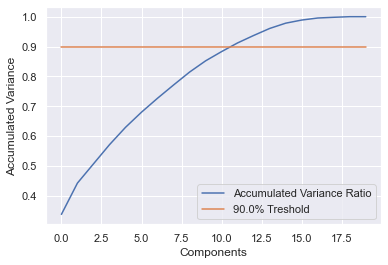

In [76]:
X_single_values_train_pca, X_single_values_test_pca, pca_single_values = get_PCA(X_single_values_train, X_single_values_test, 0.9)

In [77]:
X_single_values_train_pca.shape

(64263, 11)

In [78]:
len(X_single_values_train_pca)+len(X_single_values_test_pca)

80329

In [79]:
X_single_values.shape

(80329, 20)

### 5 days mean value

#### Prepare the dataset

In [80]:
mean_5_games_df.columns

Index(['Minutes played', 'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'Game Date', 'Season ID', 'Player ID',
       'Player Name', 'Game ID', 'Draftkings score',
       'Draftkings next game score', 'Opp - Minutes played',
       'Opp - Field Goals Made', 'Opp - Field Goals Attempted',
       'Opp - Field Goals 3 Points Made', 'Opp - Field Goal 3 Points Attempt',
       'Opp - Free Throws Made', 'Opp - Free Throws Attempt',
       'Opp - Offensive Rebounds', 'Opp - Defensive Rebounds', 'Opp - Assists',
       'Opp - Steals', 'Opp - Blocks', 'Opp - Turnovers',
       'Opp - Personal Fouls', 'Opp - Points',
       'Opp - Player Efficiency Ratings', 'Opp - Double-double',
     

In [81]:
columns_to_drop = ['Game Date', 'Season ID', 'Player ID',
    'Player Name', 'Game ID', 'Draftkings score',
    'Draftkings next game score']

In [82]:
y_mean_5_games = mean_5_games_df['Draftkings next game score']
X_mean_5_games = mean_5_games_df.drop(columns_to_drop, axis=1)
X_mean_5_games.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Opp - Minutes played,Opp - Field Goals Made,Opp - Field Goals Attempted,Opp - Field Goals 3 Points Made,Opp - Field Goal 3 Points Attempt,Opp - Free Throws Made,Opp - Free Throws Attempt,Opp - Offensive Rebounds,Opp - Defensive Rebounds,Opp - Assists,Opp - Steals,Opp - Blocks,Opp - Turnovers,Opp - Personal Fouls,Opp - Points,Opp - Player Efficiency Ratings,Opp - Double-double,Opp - Triple-double
0,35.2,10.6,22.4,4.8,10.8,5.0,6.0,0.2,3.2,5.4,1.0,0.2,2.0,1.6,31.0,42.7724,0.0,0.0,36.0,5.0,14.0,3.0,9.0,10.0,11.0,0.0,3.0,6.0,1.0,1.0,1.0,2.0,23.0,34.750,0.0,0.0
1,35.6,4.0,10.2,2.0,5.6,0.8,1.0,0.8,4.2,3.4,1.2,0.6,2.0,1.2,10.8,18.6620,0.0,0.0,38.0,6.0,15.0,1.0,6.0,0.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0,0.0,13.0,16.373,0.0,0.0
2,14.6,2.6,4.8,0.4,0.8,2.6,3.4,2.2,3.4,0.8,0.6,0.0,1.2,2.0,8.2,29.0848,0.0,0.0,14.0,1.0,2.0,0.0,0.0,5.0,6.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,23.180,0.0,0.0


#### Split the dataset

In [83]:
X_mean_5_games_train, X_mean_5_games_test, y_mean_5_games_train, y_mean_5_games_test = train_test_split(X_mean_5_games, y_mean_5_games, test_size=0.2, random_state=0)

#### Standard Scaler

In [84]:
scaler_mean_5_games = StandardScaler()
X_mean_5_games_train = scaler_mean_5_games.fit_transform(X_mean_5_games_train)
X_mean_5_games_test = scaler_mean_5_games.transform(X_mean_5_games_test)

#### PCA

Original number of features: 36
Number of components: 15
Number of components: 90.05%


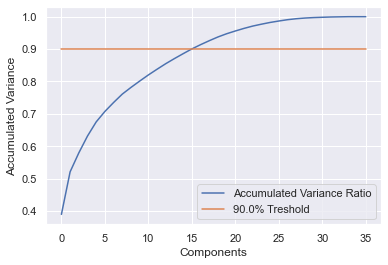

In [85]:
X_mean_5_games_train_pca, X_mean_5_games_test_pca, pca_mean_5_games = get_PCA(X_mean_5_games_train, X_mean_5_games_test, 0.9)

### 10 days mean value

#### Prepare the dataset

In [86]:
mean_10_games_df.columns

Index(['Minutes played', 'Field Goals Made', 'Field Goals Attempted',
       'Field Goals 3 Points Made', 'Field Goal 3 Points Attempt',
       'Free Throws Made', 'Free Throws Attempt', 'Offensive Rebounds',
       'Defensive Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Player Efficiency Ratings',
       'Double-double', 'Triple-double', 'Game Date', 'Season ID', 'Player ID',
       'Player Name', 'Game ID', 'Draftkings score',
       'Draftkings next game score', 'Opp - Minutes played',
       'Opp - Field Goals Made', 'Opp - Field Goals Attempted',
       'Opp - Field Goals 3 Points Made', 'Opp - Field Goal 3 Points Attempt',
       'Opp - Free Throws Made', 'Opp - Free Throws Attempt',
       'Opp - Offensive Rebounds', 'Opp - Defensive Rebounds', 'Opp - Assists',
       'Opp - Steals', 'Opp - Blocks', 'Opp - Turnovers',
       'Opp - Personal Fouls', 'Opp - Points',
       'Opp - Player Efficiency Ratings', 'Opp - Double-double',
     

In [87]:
columns_to_drop = ['Game Date', 'Season ID', 'Player ID',
    'Player Name', 'Game ID', 'Draftkings score',
    'Draftkings next game score']

In [88]:
y_mean_10_games = mean_10_games_df['Draftkings next game score']
X_mean_10_games = mean_10_games_df.drop(columns_to_drop, axis=1)
X_mean_10_games.head(3)

,Minutes played,Field Goals Made,Field Goals Attempted,Field Goals 3 Points Made,Field Goal 3 Points Attempt,Free Throws Made,Free Throws Attempt,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Player Efficiency Ratings,Double-double,Triple-double,Opp - Minutes played,Opp - Field Goals Made,Opp - Field Goals Attempted,Opp - Field Goals 3 Points Made,Opp - Field Goal 3 Points Attempt,Opp - Free Throws Made,Opp - Free Throws Attempt,Opp - Offensive Rebounds,Opp - Defensive Rebounds,Opp - Assists,Opp - Steals,Opp - Blocks,Opp - Turnovers,Opp - Personal Fouls,Opp - Points,Opp - Player Efficiency Ratings,Opp - Double-double,Opp - Triple-double
0,31.7,7.6,15.5,1.5,5.4,2.3,3.0,0.6,4.5,1.6,0.2,0.7,1.1,2.7,19.0,26.9807,0.0,0.0,32.0,8.0,18.0,2.0,7.0,1.0,2.0,2.0,4.0,3.0,0.0,0.0,0.0,2.0,19.0,30.789,0.0,0.0
1,35.0,9.6,19.1,1.5,5.2,6.1,7.9,0.8,6.8,7.7,1.7,0.7,3.2,2.1,26.8,39.8832,0.5,0.1,36.0,11.0,23.0,3.0,6.0,4.0,5.0,3.0,7.0,8.0,2.0,2.0,5.0,2.0,29.0,44.685,1.0,0.0
2,26.5,3.6,7.8,1.9,4.6,0.5,0.9,0.8,4.0,4.3,1.1,0.0,1.5,1.9,9.6,21.6691,0.0,0.0,24.0,2.0,6.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,6.256,0.0,0.0


#### Split the dataset

In [89]:
X_mean_10_games_train, X_mean_10_games_test, y_mean_10_games_train, y_mean_10_games_test = train_test_split(X_mean_10_games, y_mean_10_games, test_size=0.2, random_state=0)

#### Standard Scaler

In [90]:
scaler_mean_10_games = StandardScaler()
X_mean_10_games_train = scaler_mean_10_games.fit_transform(X_mean_10_games_train)
X_mean_10_games_test = scaler_mean_10_games.transform(X_mean_10_games_test)

#### PCA

Original number of features: 36
Number of components: 14
Number of components: 90.22%


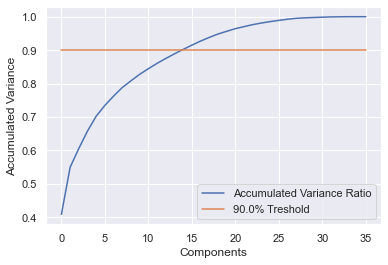

In [91]:
X_mean_10_games_train_pca, X_mean_10_games_test_pca, pca_mean_10_games = get_PCA(X_mean_10_games_train, X_mean_10_games_test, 0.9)

## Save the datasets

### Single values

#### Pickle

In [92]:
# import pickle
# import pandas as pd

# # Scaler
# with open('Datasets/PCA/scaler_single_values.pkl', 'wb') as f:
#     pickle.dump(scaler_single_values, f)

# # X_train
# with open('Datasets/PCA/X_single_values_train_pca.pkl', 'wb') as f:
#     pickle.dump(X_single_values_train_pca, f)

# # X_test
# with open('Datasets/PCA/X_single_values_test_pca.pkl', 'wb') as f:
#     pickle.dump(X_single_values_test_pca, f)

# # y_train
# with open('Datasets/PCA/y_single_values_train.pkl', 'wb') as f:
#     pickle.dump(y_single_values_train, f)

# # y_test
# with open('Datasets/PCA/y_single_values_test.pkl', 'wb') as f:
#     pickle.dump(y_single_values_test, f)

# # PCA
# with open('Datasets/PCA/pca_single_values.pkl', 'wb') as f:
#     pickle.dump(pca_single_values, f)

#### Unpickle

In [ ]:
import pickle
import pandas as pd

# Scaler
# with open('Datasets/PCA/scaler_single_values.pkl', 'rb') as f:
    # scaler_single_values = pickle.load(f)

# X_train
# with open('Datasets/PCA/X_single_values_train_pca.pkl', 'rb') as f:
    # X_single_values_train_pca = pickle.load(f)

# X_test
# with open('Datasets/PCA/X_single_values_test_pca.pkl', 'rb') as f:
    # X_single_values_test_pca = pickle.load(f)

# y_train
# with open('Datasets/PCA/y_single_values_train.pkl', 'rb') as f:
    # y_single_values_train = pickle.load(f)

# y_test
# with open('Datasets/PCA/y_single_values_test.pkl', 'rb') as f:
    # y_single_values_test = pickle.load(f)

# PCA
# with open('Datasets/PCA/pca_single_values.pkl', 'rb') as f:
    # pca_single_values = pickle.load(f)

### Mean - 5 games

#### Pickle

In [93]:
# import pickle
# import pandas as pd

# # Scaler
# with open('Datasets/PCA/scaler_mean_5_games.pkl', 'wb') as f:
#     pickle.dump(scaler_mean_5_games, f)

# # X_train
# with open('Datasets/PCA/X_mean_5_games_train_pca.pkl', 'wb') as f:
#     pickle.dump(X_mean_5_games_train_pca, f)

# # X_test
# with open('Datasets/PCA/X_mean_5_games_test_pca.pkl', 'wb') as f:
#     pickle.dump(X_mean_5_games_test_pca, f)

# # y_train
# with open('Datasets/PCA/y_mean_5_games_train.pkl', 'wb') as f:
#     pickle.dump(y_mean_5_games_train, f)

# # y_test
# with open('Datasets/PCA/y_mean_5_games_test.pkl', 'wb') as f:
#     pickle.dump(y_mean_5_games_test, f)

# # PCA
# with open('Datasets/PCA/pca_mean_5_games.pkl', 'wb') as f:
#     pickle.dump(pca_mean_5_games, f)

#### Unpickle

In [ ]:
import pickle
import pandas as pd

# Scaler
# with open('Datasets/PCA/scaler_mean_5_games.pkl', 'rb') as f:
    # scaler_mean_5_games = pickle.load(f)

# X_train
# with open('Datasets/PCA/X_mean_5_games_train_pca.pkl', 'rb') as f:
    # X_mean_5_games_train_pca = pickle.load(f)

# X_test
# with open('Datasets/PCA/X_mean_5_games_test_pca.pkl', 'rb') as f:
    # X_mean_5_games_test_pca = pickle.load(f)

# y_train
# with open('Datasets/PCA/y_mean_5_games_train.pkl', 'rb') as f:
    # y_mean_5_games_train = pickle.load(f)

# y_test
# with open('Datasets/PCA/y_mean_5_games_test.pkl', 'rb') as f:
    # y_mean_5_games_test = pickle.load(f)

# PCA
# with open('Datasets/PCA/pca_mean_5_games.pkl', 'rb') as f:
    # pca_mean_5_games = pickle.load(f)

### Mean - 10 games

#### Pickle

In [94]:
# import pickle
# import pandas as pd

# # Scaler
# with open('Datasets/PCA/scaler_mean_10_games.pkl', 'wb') as f:
#     pickle.dump(scaler_mean_10_games, f)

# # X_train
# with open('Datasets/PCA/X_mean_10_games_train_pca.pkl', 'wb') as f:
#     pickle.dump(X_mean_10_games_train_pca, f)

# # X_test
# with open('Datasets/PCA/X_mean_10_games_test_pca.pkl', 'wb') as f:
#     pickle.dump(X_mean_10_games_test_pca, f)

# # y_train
# with open('Datasets/PCA/y_mean_10_games_train.pkl', 'wb') as f:
#     pickle.dump(y_mean_10_games_train, f)

# # y_test
# with open('Datasets/PCA/y_mean_10_games_test.pkl', 'wb') as f:
#     pickle.dump(y_mean_10_games_test, f)

# # PCA
# with open('Datasets/PCA/pca_mean_10_games.pkl', 'wb') as f:
#     pickle.dump(pca_mean_10_games, f)

#### Unpickle

In [ ]:
import pickle
import pandas as pd

# Scaler
# with open('Datasets/PCA/scaler_mean_10_games.pkl', 'rb') as f:
    # scaler_mean_10_games = pickle.load(f)

# X_train
# with open('Datasets/PCA/X_mean_10_games_train_pca.pkl', 'rb') as f:
    # X_mean_10_games_train_pca = pickle.load(f)

# X_test
# with open('Datasets/PCA/X_mean_10_games_test_pca.pkl', 'rb') as f:
    # X_mean_10_games_test_pca = pickle.load(f)

# y_train
# with open('Datasets/PCA/y_mean_10_games_train.pkl', 'rb') as f:
    # y_mean_10_games_train = pickle.load(f)

# y_test
# with open('Datasets/PCA/y_mean_10_games_test.pkl', 'rb') as f:
    # y_mean_10_games_test = pickle.load(f)

# PCA
# with open('Datasets/PCA/pca_mean_10_games.pkl', 'rb') as f:
    # pca_mean_10_games = pickle.load(f)